In [76]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1. **Basic Data Exploration** : 

In [77]:
# To identify the number of rows and columns in the dataset
number_of_rows, number_of_columns = df.shape
print(f"Number of Rows: {number_of_rows}")
print(f"Number of Columns: {number_of_columns}")

Number of Rows: 148654
Number of Columns: 13


In [78]:
# To determine the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [79]:
# To check for missing values in each column
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2. **Descriptive Statistics** : 

In [80]:
df['salary'] = df['TotalPay']

mean_salary = df['salary'].mean()
print(f"Mean Salary: {mean_salary}")

median_salary = df['salary'].median()
print(f"Median Salary: {median_salary}")
mode_salary = df['salary'].mode()[0]  
print(f"Mode Salary: {mode_salary}")

min_salary = df['salary'].min()
print(f"Minimum Salary: {min_salary}")

max_salary = df['salary'].max() 
print(f"Maximum Salary: {max_salary}")

range_of_salary = max_salary - min_salary
print(f"Range of Salaries: {range_of_salary}")

std_deviation = df['salary'].std()
print(f"Standard Deviation: {std_deviation}")

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Range of Salaries: 568213.56
Standard Deviation: 50517.00527394987


# 3. **Data Cleaning** : 

### We start by analyzing the features one by one, and based on the quality of the data in each column and the number of missing values, we choose the appropriate method for the data cleaning process.
##### Start with : BasePay,	OvertimePay,	OtherPay


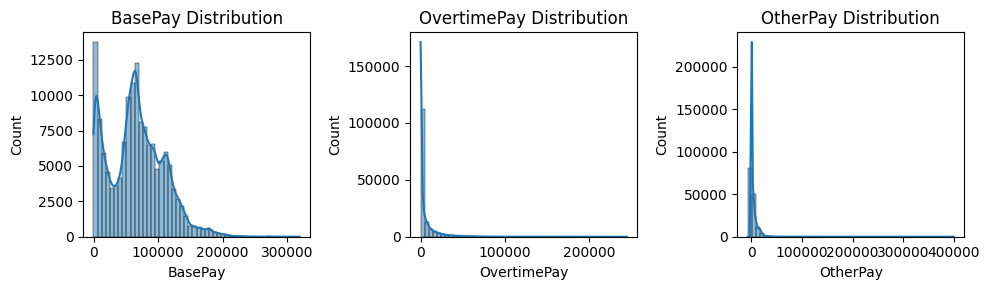

In [81]:
# Reload the original dataset to revert the changes made previously
salaries_df_original = pd.read_csv('./Salaries.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distributions of BasePay, OvertimePay, and OtherPay before filling missing values
plt.figure(figsize=(10, 3))

# BasePay
plt.subplot(1, 3, 1)
sns.histplot(salaries_df_original['BasePay'].dropna(), bins=50, kde=True)
plt.title('BasePay Distribution')

# OvertimePay
plt.subplot(1, 3, 2)
sns.histplot(salaries_df_original['OvertimePay'].dropna(), bins=50, kde=True)
plt.title('OvertimePay Distribution')

# OtherPay
plt.subplot(1, 3, 3)
sns.histplot(salaries_df_original['OtherPay'].dropna(), bins=50, kde=True)
plt.title('OtherPay Distribution')

plt.tight_layout()
plt.show()



Based on the drawings above:

The BasePay data has some outliers but isn't extremely skewed, so using the mean for missing values is okay.

For OvertimePay and OtherPay, they have lots of values near zero and a long tail of higher values, so it's better to use the median for missing values because it's less affected by outliers in these cases. 

In [82]:
# Count of non-null entries before imputation
non_null_before = salaries_df_original[['BasePay', 'OvertimePay', 'OtherPay']].count()

# For BasePay, using mean 
base_pay_mean = salaries_df_original['BasePay'].mean()
salaries_df_original['BasePay'].fillna(base_pay_mean, inplace=True)

# For OvertimePay and OtherPay
overtime_pay_median = salaries_df_original['OvertimePay'].median()
other_pay_median = salaries_df_original['OtherPay'].median()
salaries_df_original['OvertimePay'].fillna(overtime_pay_median, inplace=True)
salaries_df_original['OtherPay'].fillna(other_pay_median, inplace=True)


# Checking the count of non-null entries in 'BasePay', 'OvertimePay', and 'OtherPay' before and after imputation
# Count of non-null entries after imputation
non_null_after = salaries_df_original[['BasePay', 'OvertimePay', 'OtherPay']].count()

non_null_before, non_null_after



(BasePay        148045
 OvertimePay    148650
 OtherPay       148650
 dtype: int64,
 BasePay        148654
 OvertimePay    148654
 OtherPay       148654
 dtype: int64)

### Now fill the Benefits, Notes and Status columns
#####  Missing values in Benefits will fill with 0, under the assumption that missing values indicate no benefits. 
##### Notes and Status Columns: These columns will be dropped because they do not contain useful information.

In [83]:

# Fill missing values in Benefits with 0
salaries_df_original['Benefits'].fillna(0, inplace=True)

# Drop the 'Notes' and 'Status' columns
salaries_df_original.drop(columns=['Notes', 'Status'], inplace=True)

# Displaying information about the dataset to confirm the changes
salaries_df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


# 4. **Basic Data Visualization** : 

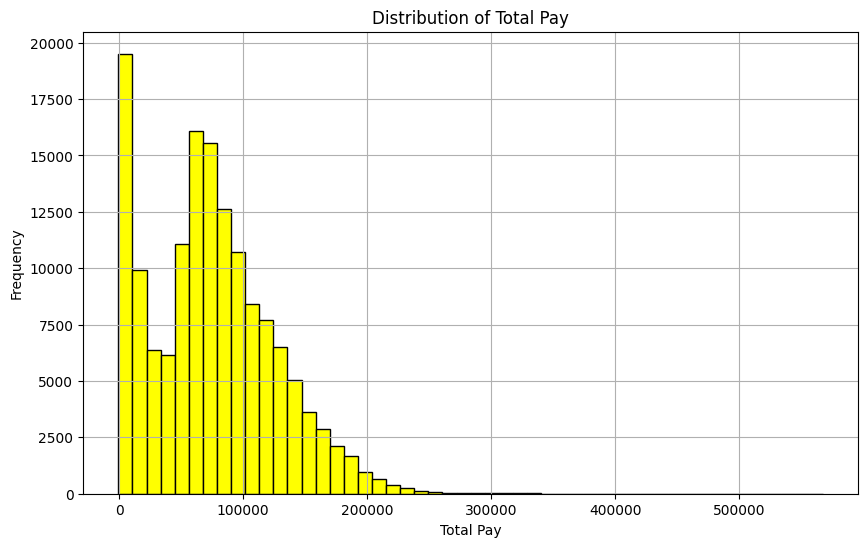

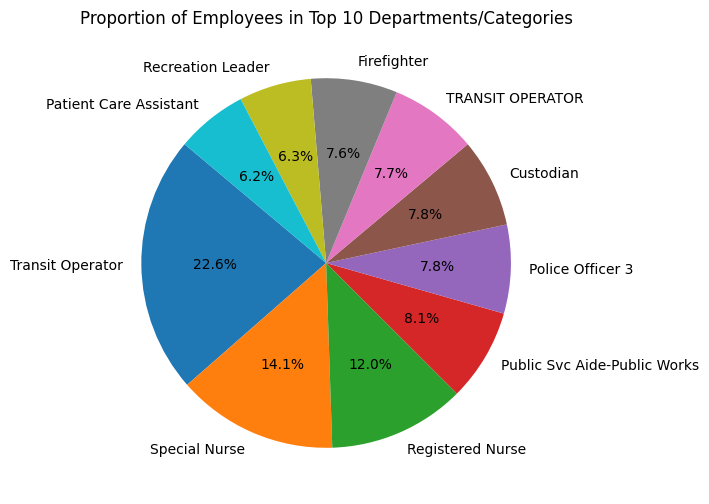

In [95]:
import matplotlib.pyplot as plt

# Histogram for TotalPay (Salaries)
plt.figure(figsize=(10, 6))
plt.hist(salaries_df_original['TotalPay'], bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Total Pay')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# We have too many different job titles in our dataset, making the pie chart not very informative. To solve this, we'll group similar job titles together to make the pie chart clearer 
# Pie chart for proportion of employees in different Job Titles (top 10)
department_counts = salaries_df_original['JobTitle'].value_counts().head(10) 
plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Top 10 Departments/Categories')
plt.show()


# 5. **Grouped Analysis** : 
##### I will  group data based on job title because I am interested in  in understanding salary disparities
##### I will group the data based on the year because I am looking at how salaries have changed over time

In [105]:
# Grouping by JobTitle and calculating summary statistics
grouped_by_jobtitle = salaries_df_original.groupby('JobTitle')['TotalPay'].describe()
grouped_by_jobtitle

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
ACCOUNT CLERK,83.0,44035.664337,13170.742908,614.00,42984.0100,49777.820,50401.8100,60838.20
ACCOUNTANT,5.0,47429.268000,27137.331315,1148.40,45304.3800,60076.240,65225.3100,65392.01
ACCOUNTANT INTERN,48.0,29031.742917,20711.322649,2981.53,9940.0000,17658.505,53789.8000,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",1.0,62290.780000,NaN,62290.78,62290.7800,62290.780,62290.7800,62290.78
ACUPUNCTURIST,1.0,67594.400000,NaN,67594.40,67594.4000,67594.400,67594.4000,67594.40
...,...,...,...,...,...,...,...,...
X-RAY LABORATORY AIDE,26.0,52705.880385,19760.943417,5343.69,51729.9150,60333.125,64305.2850,85077.40
X-Ray Laboratory Aide,100.0,50823.942700,24170.083004,1007.00,26919.2075,60047.290,68306.2425,99812.97
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1.0,53632.870000,NaN,53632.87,53632.8700,53632.870,53632.8700,53632.87


In [106]:
# Grouping by Year and calculating summary statistics
grouped_by_year = salaries_df_original.groupby('Year')['TotalPay'].describe()
grouped_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.240,102512.680,567595.43
2012,36766.0,74113.262265,49523.904319,0.00,37560.6075,70714.680,104099.170,362844.66
2013,37606.0,77611.443142,52854.774783,0.00,36754.9950,74500.015,109637.670,347102.32
2014,38123.0,75463.918140,51697.713029,-618.13,33436.2100,72359.980,107974.445,471952.64


In [108]:
# Comparing Average Salaries Across Job Titles
sorted_average_salary_by_jobtitle = grouped_by_jobtitle['mean'].sort_values(ascending=False)
print("Average Salary by Job Title:\n", sorted_average_salary_by_jobtitle)

# Comparing Average Salaries Across Years
sorted_average_salary_by_year = grouped_by_year['mean'].sort_values()
print("\nAverage Salary Over Years:\n", sorted_average_salary_by_year)


Average Salary by Job Title:
 JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: mean, Length: 2159, dtype: float64

Average Salary Over Years:
 Year
2011    71744.103871
2012    74113.262265
2014    75463.918140
2013    77611.443142
Name: mean, dtype: float64



### An explanation of the results
#####  Average Salary by Job Title:
- The top-paying job titles are "General Manager-Metropolitan Transit Authority," "Chief Investment Officer," "Chief of Police," and "Chief, Fire Department," with average salaries ranging from approximately $326,000 to $399,000.
- These roles are typically high-responsibility positions within their respective organizations, which is reflected in their higher pay.
- On the other end of the spectrum, positions like "Commissioner 16.700c, No Pay," "IS Technician Assistant," "Not provided," "Public Safety Comm Tech," and "Drug Court Coordinator" have very low to no average salaries. These might represent volunteer positions, roles without regular pay, or data entry errors.


##### Average Salary Over Years:
- In **2011**, the average salary was approximately $71,744.
- There was a steady increase in the average salary over the next few years. In **2012**, the average salary rose to about $74,113.
- The upward trend continued in **2013**, where the average salary reached its peak at approximately $77,611.
- However, in **2014**, there was a slight decrease in the average salary compared to 2013, with the average standing at around $75,464.

# 6. **Simple Correlation Analysis** : 
#####  A good choice for this analysis might be 'BasePay', 'OvertimePay', 'OtherPay', or 'Benefits', as these are likely to have a direct impact on the total salary.

Correlation between Total Pay and BasePay: 0.95


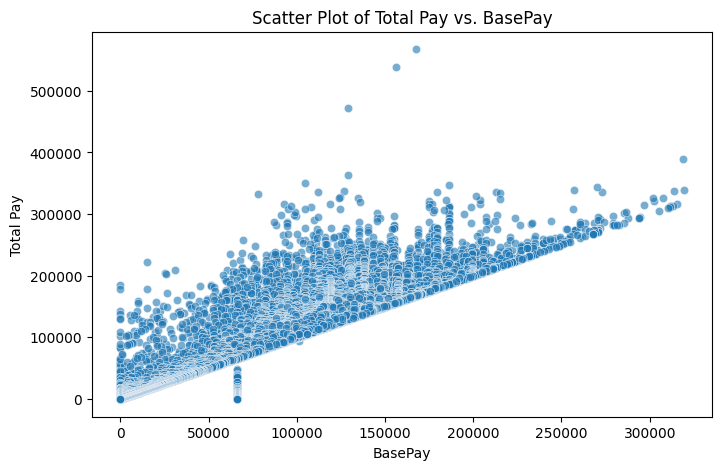

Correlation between Total Pay and OvertimePay: 0.50


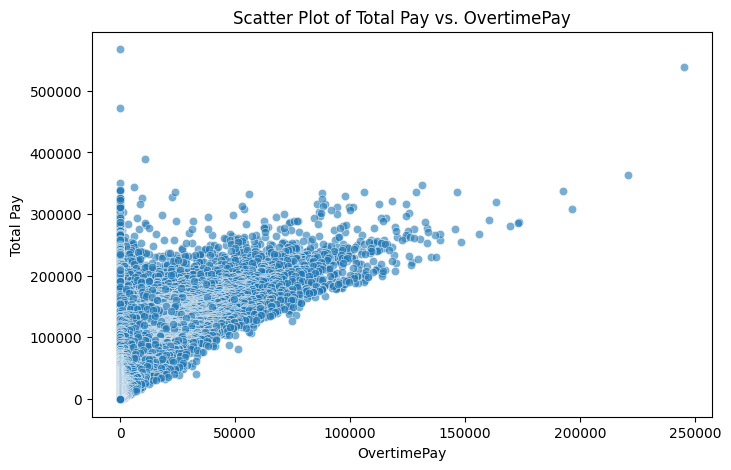

Correlation between Total Pay and OtherPay: 0.47


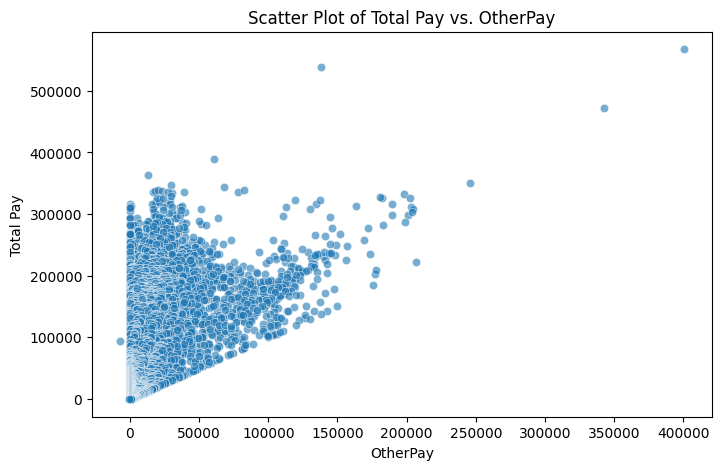

Correlation between Total Pay and Benefits: 0.63


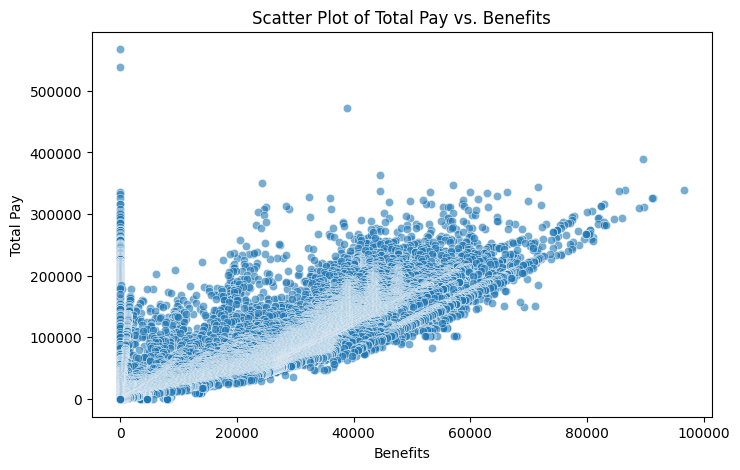

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to compare with TotalPay
columns_to_compare = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

# Calculating and plotting
for column in columns_to_compare:
    # Calculate the correlation
    correlation = salaries_df_original[['TotalPay', column]].corr().iloc[0, 1]
    print(f"Correlation between Total Pay and {column}: {correlation:.2f}")

    # Scatter plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=salaries_df_original, x=column, y='TotalPay', alpha=0.6)
    plt.title(f'Scatter Plot of Total Pay vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Total Pay')
    plt.show()


##### Based on the result  of correlations:

1. **Total Pay and BasePay**:
   - There is a very strong positive connection of 0.95 between Total Pay and BasePay.
   - This means that when BasePay goes up, Total Pay significantly increases, showing that BasePay plays a major role in Total Pay.

2. **Total Pay and OvertimePay**:
   - The correlation is 0.50, indicating a moderate positive relationship.
   - Higher overtime payments are somewhat linked to higher total earnings, but other factors matter too.

3. **Total Pay and OtherPay**:
   - With a correlation of 0.47, there's a moderate positive link.
   - OtherPay contributes to Total Pay, but it's not as influential as BasePay.

4. **Total Pay and Benefits**:
   - The correlation is 0.63, signifying a moderately strong positive relationship.
   - Benefits are a significant part of Total Pay, although not as dominant as BasePay.

To sum it up, BasePay has the strongest connection with Total Pay, making it the primary factor in determining an employee's earnings. OvertimePay, OtherPay, and Benefits also matter, but they have a smaller impact compared to BasePay.

# 8. **Summary of Insights** : 

### Key Findings from Data Analysis

1. **Data Overview**:

- The dataset comprises data  employee salaries, including 148,654 rows and 13 columns.
- Key columns include 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', and 'TotalPay'.
- There were significant missing values in 'BasePay', 'OvertimePay', 'OtherPay', and especially in 'Benefits', as well as complete absence of data in 'Notes' and 'Status'.

2. **Salary Analysis**:

- The mean salary (TotalPay) for the dataset is approximately $74,768.
- The median salary is around $71,427, indicating a distribution that's slightly right-skewed.
- The range of salaries is vast, from -$618.13 to $567,595.43, indicating a wide disparity in employee compensation.
- The standard deviation of salaries is about $50,517, suggesting a high variation in pay.

3. **Cleaning and Handling Missing Data**:
 - We dealt with missing values in 'BasePay', 'OvertimePay', and 'OtherPay' through imputation. For 'BasePay', we used the mean due to its moderate skewness, while for 'OvertimePay' and 'OtherPay,' we opted for the median because of their right-skewed distribution.

 - Missing values in 'Benefits' were filled with zero, assuming that absence implies no benefits.
 - We removed 'Notes' and 'Status' columns as they contained no valuable information.

4. **Analyzing by Job Title and Year**:
 - Grouping the data by 'JobTitle' revealed significant variations in salaries, reflecting the diversity of roles and hierarchies.
 - Examining different years showed a general salary increase from 2011 to 2013, with a slight dip in 2014.

5. **Correlation Insights**:
 - We found a strong positive correlation of 0.95 between 'TotalPay' and 'BasePay,' highlighting the crucial role of BasePay in determining Total Pay.
 - Moderate correlations were observed between 'TotalPay' and 'OvertimePay' (0.50), 'OtherPay' (0.47), and 'Benefits' (0.63), indicating their contributions to total compensation, though less significant compared to BasePay.